In [1]:
from langgraph.graph import StateGraph ,START, END
from typing import TypedDict , Literal 
# Literal (from typing) allows you to say:
# “This value must be exactly one of these specific values.”

In [2]:
class Quadratic(TypedDict):
    a:int 
    b:int
    c:int

    equation:str
    discriminant:float
    result :str

In [3]:
def show_equation(state:Quadratic):
    equation = f'{state["a"]}x^2+{state["b"]}x+{state["c"]}'
    return {'equation': equation}

In [4]:
def discriminant(state:Quadratic):
    discriminant = state["b"]**2 - 4*state["a"]*state["c"]
    return {"discriminant":discriminant}

In [5]:
def real_roots(state : Quadratic):
    root1 = (-state["b"]+(state["discriminant"]**0.5))/(2*state["a"])
    root2 = (-state["b"]-(state["discriminant"]**0.5))/(2*state["a"])
    result = f'The roots are {root1} and {root2}'
    return {'result': result}

In [6]:
def repeated_roots(state:Quadratic):
    root = -state["b"]/(2*state["a"])
    result = f'The root is {root}'
    return {'result': result}

In [7]:
def no_real_roots(state : Quadratic):
    result ='The equation has no real roots'
    return {'result':result}


In [8]:
def check_condition(state:Quadratic) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:
    if(state["discriminant"]>0):
        return "real_roots"
    elif(state["discriminant"]==0):
        return "repeated_roots"
    else:
        return "no_real_roots"

In [18]:
graph = StateGraph(Quadratic)

graph.add_node('show_equation', show_equation)
graph.add_node('discriminant', discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots', repeated_roots)
graph.add_node('no_real_roots', no_real_roots)


graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation','discriminant')


graph.add_conditional_edges('discriminant', check_condition)

graph.add_edge('real_roots',END)
graph.add_edge('repeated_roots',END)
graph.add_edge('no_real_roots',END) 

In [19]:
workflow = graph.compile()

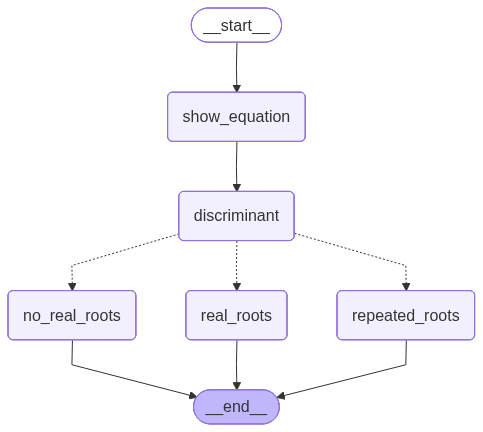

In [20]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [21]:
workflow.invoke({'a':1,'b':-3,'c':2})

{'a': 1,
 'b': -3,
 'c': 2,
 'equation': '1x^2+-3x+2',
 'discriminant': 1,
 'result': 'The roots are 2.0 and 1.0'}